# ***Importing Libraries & Dataset***

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Loading the dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [4]:
# Normalizing the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [5]:
# One-hot encoding the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [6]:
print (f'We have {len(x_train)} train images')
print (f'We have {len(x_test)} test images')

We have 50000 train images
We have 10000 test images


# ***Visualization***

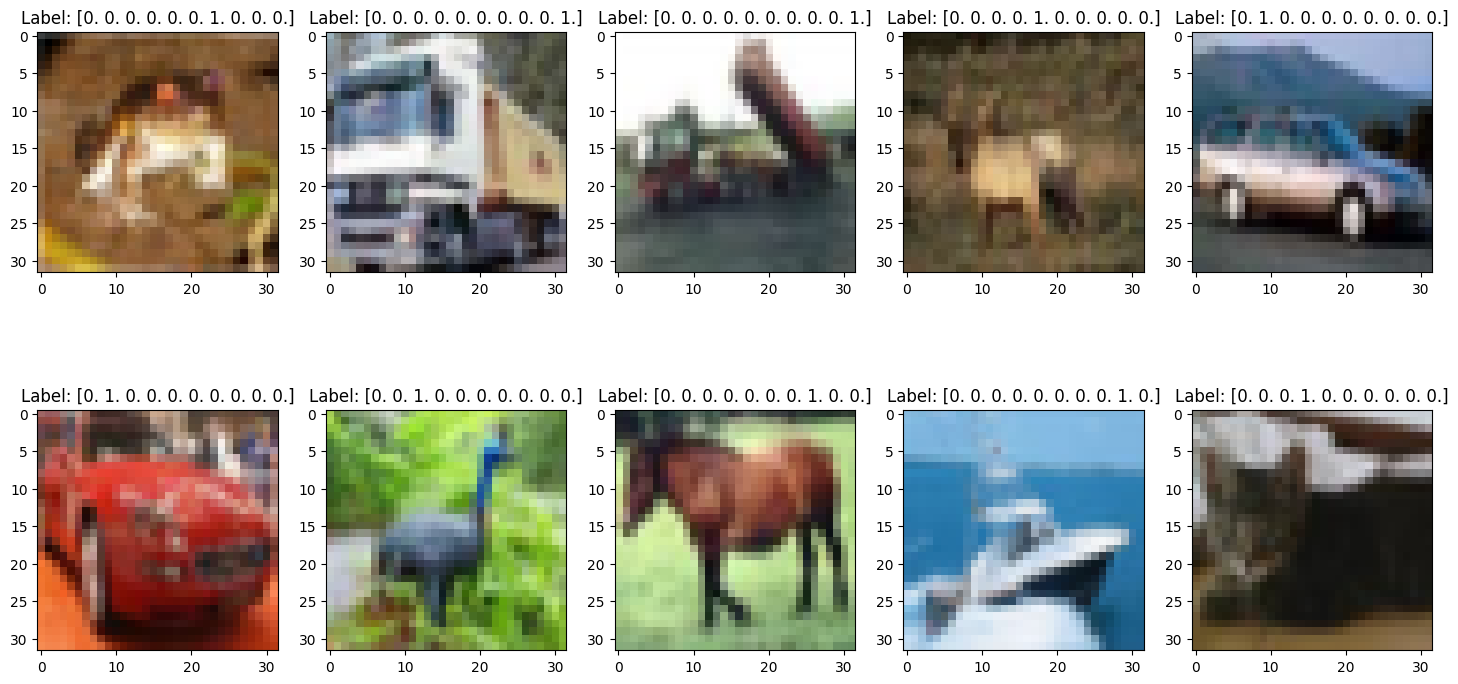

In [8]:
plt.figure(figsize = (18, 9))
for i in range(10):
  plt.subplot(2, 5, i+1)
  plt.imshow(x_train[i])
  plt.title(f'Label: {y_train[i]}')
plt.show()

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train)

# ***Model Training***

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 6, 6, 64)          0

In [ ]:
batch_size = 64
epochs = 5

history = model.fit(
    datagen.flow(x_train, y_train, batch_size=batch_size),
    epochs=epochs,
    validation_data=(x_test, y_test),
    steps_per_epoch=x_train.shape[0] // batch_size
)

Epoch 1/5
781/781 [==============================] - 37s 47ms/step - loss: 1.5887 - accuracy: 0.4203 - val_loss: 1.2778 - val_accuracy: 0.5399
Epoch 2/5
781/781 [==============================] - 38s 49ms/step - loss: 1.3708 - accuracy: 0.5074 - val_loss: 1.1306 - val_accuracy: 0.5935
Epoch 3/5
781/781 [==============================] - 36s 46ms/step - loss: 1.2655 - accuracy: 0.5485 - val_loss: 1.0335 - val_accuracy: 0.6396
Epoch 4/5
781/781 [==============================] - 35s 45ms/step - loss: 1.2026 - accuracy: 0.5690 - val_loss: 0.9842 - val_accuracy: 0.6582
Epoch 5/5
781/781 [==============================] - 36s 46ms/step - loss: 1.1595 - accuracy: 0.5903 - val_loss: 1.0061 - val_accuracy: 0.6460


# ***Model Evaluation***

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, batch_size=32)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

313/313 [==============================] - 1s 3ms/step - loss: 1.0061 - accuracy: 0.6460
Test Loss: 1.0060983896255493
Test Accuracy: 0.6460000276565552


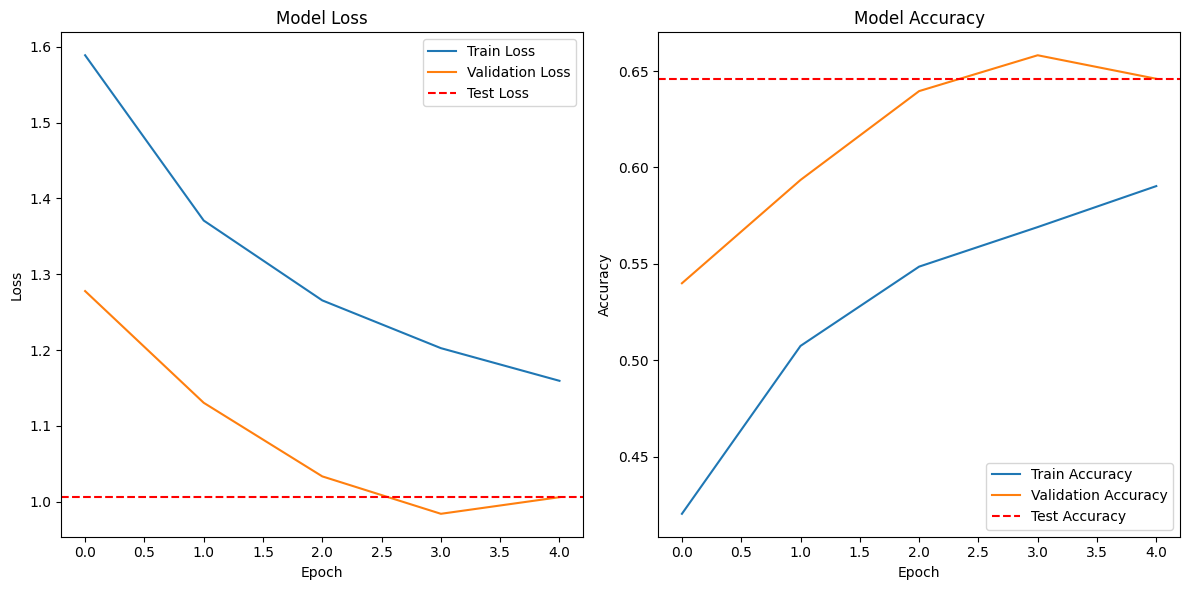

In [ ]:
# Extract data from history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot training & validation loss values along with test loss
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.axhline(y=test_loss, color='r', linestyle='--', label='Test Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

# Plot training & validation accuracy values along with test accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Train Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.axhline(y=test_accuracy, color='r', linestyle='--', label='Test Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()